In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import pickle
import matplotlib
import ipyparams

path = os.getcwd().split(os.sep + 'GUI')[0]
if path not in sys.path:
    print("not here")
    sys.path.append(path)


print(sys.path)

from neurolib_dev_optControl.neurolib.models.aln import ALNModel
from neurolib_dev_optControl.neurolib.utils import plotFunctions as plotFunc
from neurolib_dev_optControl.neurolib.utils import func_optimize as fo
from neurolib_dev_optControl.neurolib.utils import costFunctions as cost
import neurolib_dev_optControl.neurolib.dashboard.functions as functions
import neurolib_dev_optControl.neurolib.dashboard.data as data
import neurolib_dev_optControl.neurolib.dashboard.layout as layout
    
# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2 

#path = os.path.join(os.getcwd(), "plots")

cmap_ = layout.getcolormap()
darkgrey, midgrey, lightgrey, color_bi_updown, color_LC, color_bi_uposc = layout.getcolors_rgba()
exc_red = cmap_(3)
inh_blue=cmap_(0)
green = cmap_(2)

['/home/lena/Promotion/neurolib_dev_optControl/GUI/current/gui/data_noise', '/home/lena/Promotion/neurolib_dev_optControl/GUI/current/gui/data_noise', '/home/lena/Promotion/neurolib', '/home/lena/Promotion', '/usr/lib/python39.zip', '/usr/lib/python3.9', '/usr/lib/python3.9/lib-dynload', '', '/home/lena/.local/lib/python3.9/site-packages', '/usr/local/lib/python3.9/dist-packages', '/usr/lib/python3/dist-packages', '/usr/lib/python3.9/dist-packages', '/home/lena/.local/lib/python3.9/site-packages/IPython/extensions', '/home/lena/.ipython', '/home/lena/Promotion/neurolib_dev_optControl']
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
p0 = [0.86, 0.25] # high
p1 = [0.74, 0.37] # low

aln = ALNModel()

aln.params.sigma_ou = 0.
aln.params.mue_ext_mean = 0.
aln.params.mui_ext_mean = 0.
aln.params.ext_exc_current = 0.
aln.params.ext_inh_current = 0.

#aln.params.IA_init = np.zeros((1))

N = aln.params.N

state_vars = aln.state_vars
init_vars = aln.init_vars

##############################################################
def setinit(init_vars_, model):
    state_vars = model.state_vars
    init_vars = model.init_vars
    for iv in range(len(init_vars)):
        for sv in range(len(state_vars)):
            if state_vars[sv] in init_vars[iv]:
                #print("set init vars ", )
                if model.params[init_vars[iv]].ndim == 2:
                    model.params[init_vars[iv]][0,:] = init_vars_[sv]
                else:
                    model.params[init_vars[iv]][0] = init_vars_[sv]
                    
##############################################################               
def setmaxmincontrol(max_c_c, min_c_c, max_c_r, min_c_r):
    import numpy as np
    
    max_cntrl = np.zeros(( 6 ))
    min_cntrl = np.zeros(( 6 ))
    
    max_cntrl[0] = max_c_c
    min_cntrl[0] = min_c_c
    max_cntrl[1] = max_c_c
    min_cntrl[1] = min_c_c
    max_cntrl[2] = max_c_r
    min_cntrl[2] = min_c_r
    max_cntrl[3] = max_c_r
    min_cntrl[3] = min_c_r
    max_cntrl[4] = max_c_r
    min_cntrl[4] = min_c_r
    max_cntrl[5] = max_c_r
    min_cntrl[5] = min_c_r
            
    return max_cntrl, min_cntrl

In [3]:
savepath = (os.getcwd().split('neurolib')[0] + 'Talks_Conf_Workshops_Schools' + os.sep + '22' + os.sep + 'FRANCE22' + 
     os.sep + 'FENS' + os.sep + 'poster' + os.sep + 'print' + os.sep + 'images')

In [20]:
dur_pre = 10
dur_post = 10
dur = 500.
dt = aln.params.dt
T = int(1 + dur / dt)

max_it = 10
init_it = 10
prec_vars = [0,1]
trans_time = 0.6
repeat = 20

n_pre = int(np.around(dur_pre/aln.params.dt + 1.,1))
n_post = int(np.around(dur_post/aln.params.dt + 1.,1))

tol = 1e-32
start_step = 10.
c_scheme = np.zeros(( 1,1 ))
c_scheme[0,0] = 1.
u_mat = np.identity(1)
u_scheme = np.array([[1.]])

maxC = [5., -5., 0.18, 0.]
n_dur = int(np.around(dur/aln.params.dt + 1.,1))
max_cntrl, min_cntrl = setmaxmincontrol(maxC[0], maxC[1], maxC[2], maxC[3])

nb = ipyparams.notebook_name
print('nb = ', nb)

case = '1'

if case in ['1', '2']:
    max_I = [3., -3.]
elif case in ['3', '4']:
    max_I = [3., -3.]

read_file = '..' + os.sep + 'data_2' + os.sep + 'adaptation_excursion' + os.sep + '1_E.pickle'

nb =  down_up_excursion_M3.ipynb


In [5]:
if os.path.isfile(read_file) :
    print("file found")
    
    with open(read_file,'rb') as f:
        load_array = pickle.load(f)

    bestControl = load_array[0]
    
init_control_noisefree = bestControl.copy()

file found


In [6]:
sigma_ou_array = [0.01, 0.03, 0.1]
noise_realizations_array = [0,20,100]
noise_realizations_final = 10000

In [7]:
n_sig = len(sigma_ou_array)
n_noise = len(noise_realizations_array)

int_t_pen = np.around( (1. - trans_time)*dur/aln.params.dt, 1).astype(int)

cost_final_mean = np.zeros(( n_sig,n_noise ))
target = [None] * n_sig
control_ = [ [None] * n_noise, [None] * n_noise, [None] * n_noise ]
cost_ = control_.copy()
cost_final = control_.copy()

stddev = np.zeros((n_sig))

w_p = np.zeros((n_sig))
w_e = 0.
w_s = 1.

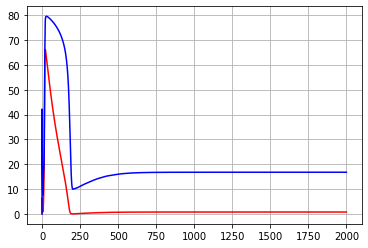

In [8]:
# get init vars without noise
aln.params.sigma_ou = 0.
aln.params.duration = 2000.

aln.params.mue_ext_mean = p1[0] * 5.
aln.params.mui_ext_mean = p1[1] * 5.

aln.run(control=aln.getZeroControl())
plt.plot(aln.t, aln.rates_exc[0,:], color='red')
plt.plot(aln.t, aln.rates_inh[0,:], color='blue')
plt.show()

init_state_vars = np.zeros(( len(state_vars) ))
for j in range(len(state_vars)):
    if aln.state[state_vars[j]].size == 1:
        init_state_vars[j] = aln.state[state_vars[j]][0]
    else:
        init_state_vars[j] = aln.state[state_vars[j]][0,-1]

initVars = init_state_vars.copy()

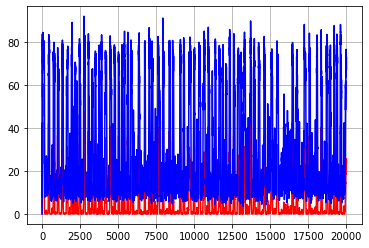

22.488462387390904
69.18834465956103


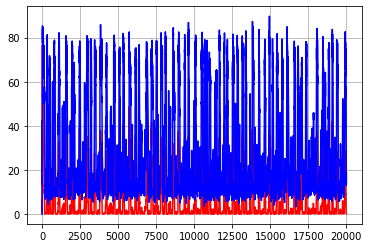

22.275539651551682
68.97723786966668


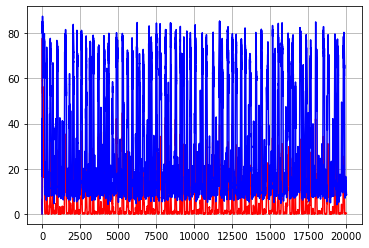

21.58049540681299
68.78023810598818


In [9]:
for i_sigma in range(n_sig):

    aln.params.sigma_ou = 0.1

    aln.params.duration = 20000.

    aln.params.mue_ext_mean = p1[0] * 5.
    aln.params.mui_ext_mean = p1[1] * 5.

    aln.run(control=aln.getZeroControl())
    plt.plot(aln.t, aln.rates_exc[0,:], color='red')
    plt.plot(aln.t, aln.rates_inh[0,:], color='blue')
    plt.show()

    e_ = []
    i_ = []
    t_ind = []

    for t in range(len(aln.t)):

        if aln.rates_exc[0,t] < 10:
            continue
        if aln.rates_inh[0,t] < 50:
            continue

        t_ind.append(t)
        e_.append(aln.rates_exc[0,t])
        i_.append(aln.rates_inh[0,t])

    print(np.mean(e_))
    print(np.mean(i_))
    
    aln.params.duration = dur
    target[i_sigma] = aln.getZeroTarget()

    target[i_sigma][0,0,:] = np.mean(e_)
    target[i_sigma][0,1,:] = np.mean(i_)

    stddev[i_sigma] = np.std(e_) + np.std(i_)
    
    w_p[i_sigma] = 1. / ( ( stddev[i_sigma] ) * (1. - trans_time) * dur )

In [25]:
max_it = 15
init_it = 5

aln.params.duration = dur
zero_init = aln.getZeroControl()
    
cost.setParams(w_p[i_sigma], w_e, w_s)

for i_sigma in range(len(sigma_ou_array)):
    for i_noise in range(len(noise_realizations_array)):
        
        if i_noise in [0]:
            continue
            
        if i_sigma in []:
            continue

        noise_realizations = noise_realizations_array[i_noise]
        sigma_ou = sigma_ou_array[i_sigma]
        aln.params.sigma_ou = sigma_ou
        
        aln.params.duration = dur
        
        n_ = 0
        control_sum = np.zeros(( init_control_noisefree[:,:,:].shape ))
        
        print(noise_realizations)
        
        if i_noise in [1,2]:
                
            print('--------', n_)

            setinit(initVars, aln)
            
            #zero_init[0,1,1500:2000] = -3.

            bestControl, bestState, c_, runtime, grad, phi, costnode, total_cost_mean_std = aln.A1(
                zero_init, target[i_sigma], c_scheme, u_mat, u_scheme, max_iteration_ = init_it,
                tolerance_ = tol, startStep_ = start_step, max_control_ = max_cntrl, min_control_ = min_cntrl,
                t_sim_ = dur, t_sim_pre_ = dur_pre, t_sim_post_ = dur_post, CGVar = None,
                control_variables_ = [1], prec_variables_ = prec_vars, transition_time_ = trans_time,
                noise_real=noise_realizations, init_params = initVars, method='M1')

            control_init = bestControl[:,:,100:-100].copy()
            setinit(initVars, aln)
            aln.params.duration = dur

            bestControl, bestState, c_, runtime, grad, phi, costnode, total_cost_mean_std = aln.A1(
                control_init, target[i_sigma], c_scheme, u_mat, u_scheme, max_iteration_ = max_it,
                tolerance_ = tol, startStep_ = start_step, max_control_ = max_cntrl, min_control_ = min_cntrl,
                t_sim_ = dur, t_sim_pre_ = dur_pre, t_sim_post_ = dur_post, CGVar = None,
                control_variables_ = [0,1], prec_variables_ = prec_vars, transition_time_ = trans_time,
                noise_real=noise_realizations, init_params = initVars, method='M1')
            
            control_[i_sigma][i_noise] = bestControl
        
        else:
            control_[i_sigma][i_noise] = factor[i_sigma] * init_control_noisefree[:,:,:-900]
        
        aln.params.duration = dur
        setinit(initVars, aln)

        init_control = aln.getZeroControl()           
        init_control[:,:,:] = control_[i_sigma][i_noise][:,:,100:-100]
        T = int(1 + dur/aln.params.dt)
        dt = aln.params.dt

        target_ = target[i_sigma].copy()
        target_[0,0,:int(trans_time * dur / aln.params.dt)] = -1000
        target_[0,1,:int(trans_time * dur / aln.params.dt)] = -1000

        cost_final = np.zeros(( noise_realizations_final ))

        for n_ in range(noise_realizations_final):
            state_ = fo.updateState(aln, init_control)
            cost_final[n_] += cost.numba_cost_precision_int(1,T,dt,w_p[i_sigma],state_, target_, list(prec_vars) )
            cost_final[n_] += cost.numba_cost_sparsity_int(1, 6, T, w_s, dt, init_control)
            
            #plt.plot(aln.t, aln.rates_exc[0,:])
        #plt.show()

        cost_final_mean[i_sigma, i_noise] = np.mean(cost_final)
        print('mean = ', cost_final_mean[i_sigma, i_noise])

set cost params:  0.0003377469580245803 0.0 1.0
20
-------- 0
interpolate adjoint :  True True True
RUN  0 , total integrated cost =  108.27103066464574
Gradient descend method:  None
RUN  1 , total integrated cost =  45.584093056603884
RUN  2 , total integrated cost =  56.67387133428069
RUN  3 , total integrated cost =  43.79702475036514
RUN  4 , total integrated cost =  39.4157686617976


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial 

RUN  5 , total integrated cost =  42.22543893939877
RUN  5 , total integrated cost mean =  42.22543893939877
Improved over  5  iterations in  10.663605017994996  seconds by  61.00024292722758  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.31239893771888 -61.314626103385194
Problem in initial value trasfer post:  Vmean_exc -67.49973471354565 -67.50985859314187
Problem in initial value trasfer pre:  Vmean_exc -61.20493383506573 -61.20747705472921
Problem in initial value trasfer post:  Vmean_exc -65.43010383745266 -65.48283513714722
Problem in initial value trasfer pre:  Vmean_exc -61.20907989344476 -61.20949628207525
Problem in initial value trasfer post:  Vmean_exc -67.45946054976952 -67.46564040176092
Problem in initial value trasfer pre:  Vmean_exc -61.17367548812358 -61.17297537432337
Problem in initial value trasfer post:  Vmean_exc -66.98373134261968 -66.99297813962912
Problem in initial value trasfer pre:  Vmean_exc -61.23972223841896 -61.241096432779614
Problem i

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial 

RUN  15 , total integrated cost =  7.10041855763713
RUN  15 , total integrated cost mean =  7.10041855763713
Improved over  15  iterations in  36.259061713994015  seconds by  84.0775079732772  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.98901938983493 -60.98652144099246
Problem in initial value trasfer post:  Vmean_exc -57.936254929819775 -57.96315984051394
Problem in initial value trasfer pre:  Vmean_exc -61.308871643975486 -61.31106653978048
Problem in initial value trasfer post:  Vmean_exc -58.281302143621964 -58.31381539333886
Problem in initial value trasfer pre:  Vmean_exc -61.295323085641876 -61.29495172546329
Problem in initial value trasfer post:  Vmean_exc -58.383183333275184 -58.416467903962754
Problem in initial value trasfer pre:  Vmean_exc -61.16171854801689 -61.16145242018115
Problem in initial value trasfer post:  Vmean_exc -58.02814823712236 -58.054026688563276
Problem in initial value trasfer pre:  Vmean_exc -61.150671153517685 -61.14928051644488
Pro

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial 

ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial 

RUN  5 , total integrated cost mean =  30.804830065480264
Improved over  5  iterations in  34.59976133599412  seconds by  71.51826254257301  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.12321598405785 -61.12081189822635
Problem in initial value trasfer post:  Vmean_exc -59.143367087083696 -59.17901513096232
Problem in initial value trasfer pre:  Vmean_exc -61.17493185509119 -61.17334226177937
Problem in initial value trasfer post:  Vmean_exc -58.7109614688933 -58.74125845074006
Problem in initial value trasfer pre:  Vmean_exc -61.1856749632532 -61.187137634600674
Problem in initial value trasfer post:  Vmean_exc -59.22432508261275 -59.26182706615747
Problem in initial value trasfer pre:  Vmean_exc -61.11437807559968 -61.113964974429635
Problem in initial value trasfer post:  Vmean_exc -59.76858302943099 -59.80899080030228
Problem in initial value trasfer pre:  Vmean_exc -61.39656701438792 -61.39897679167781
Problem in initial value trasfer post:  Vmean_exc -59.21676878

interpolate adjoint :  True True True
RUN  0 , total integrated cost =  30.560834439731167
Gradient descend method:  None
step size too small or too large
step size too small or too large
RUN  1 , total integrated cost =  28.492551721141098
step size too small or too large
RUN  2 , total integrated cost =  24.884978080716632
RUN  3 , total integrated cost =  13.294537129205857
RUN  4 , total integrated cost =  12.089372924741943
RUN  5 , total integrated cost =  11.217308480001732
RUN  6 , total integrated cost =  9.97821481050725
step size too small or too large
step size too small or too large
step size too small or too large
RUN  7 , total integrated cost =  9.553864287977834
RUN  8 , total integrated cost =  9.002379184322859
step size too small or too large
step size too small or too large
RUN  9 , total integrated cost =  8.710706242799048
RUN  10 , total integrated cost =  8.346630085459125
step size too small or too large
step size too small or too large
step size too small or 

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial 

RUN  15 , total integrated cost mean =  7.256931079614982
Improved over  15  iterations in  175.5971738709486  seconds by  76.25414615583769  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.10646717996153 -61.103015881368506
Problem in initial value trasfer post:  Vmean_exc -57.76732300166716 -57.79426382350691
Problem in initial value trasfer pre:  Vmean_exc -61.01855204154661 -61.01713293417899
Problem in initial value trasfer post:  Vmean_exc -58.23049193102315 -58.263066883205326
Problem in initial value trasfer pre:  Vmean_exc -61.16442288770304 -61.16499928285735
Problem in initial value trasfer post:  Vmean_exc -58.11025245114638 -58.14231679212345
Problem in initial value trasfer pre:  Vmean_exc -61.14074582731147 -61.14030612412789
Problem in initial value trasfer post:  Vmean_exc -57.85389750472544 -57.87953931345883
Problem in initial value trasfer pre:  Vmean_exc -61.336849922994574 -61.33617232704199
Problem in initial value trasfer post:  Vmean_exc -57.90806

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial 

Problem in initial value trasfer post:  Vmean_exc -57.939780997273004 -57.96873137935761
Problem in initial value trasfer pre:  Vmean_exc -61.24718499491657 -61.247571207380076
Problem in initial value trasfer post:  Vmean_exc -57.80452485233768 -57.82806915487792
Problem in initial value trasfer pre:  Vmean_exc -61.06851729279885 -61.0675634566781
Problem in initial value trasfer post:  Vmean_exc -57.83053926867156 -57.856362884165534
Problem in initial value trasfer pre:  Vmean_exc -61.04702958182077 -61.04442057997219
Problem in initial value trasfer post:  Vmean_exc -57.90405240724148 -57.93161634673662
Problem in initial value trasfer pre:  Vmean_exc -61.04774783985383 -61.048339795208165
Problem in initial value trasfer post:  Vmean_exc -58.02113777429703 -58.04938019970615
Problem in initial value trasfer pre:  Vmean_exc -61.07811369021716 -61.07698250459853
Problem in initial value trasfer post:  Vmean_exc -58.21193342643352 -58.24496063947413
Problem in initial value trasfer p

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial 

RUN  5 , total integrated cost =  36.094576425126554
RUN  5 , total integrated cost mean =  36.094576425126554
Improved over  5  iterations in  7.3832012210041285  seconds by  63.07506756383874  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.60800477905065 -61.616071767853065
Problem in initial value trasfer post:  Vmean_exc -62.764798988622815 -62.830909361338925
Problem in initial value trasfer pre:  Vmean_exc -61.67966505902328 -61.682178014801934
Problem in initial value trasfer post:  Vmean_exc -59.49670393668074 -59.534032370760464
Problem in initial value trasfer pre:  Vmean_exc -61.2653771163977 -61.268949650768434
Problem in initial value trasfer post:  Vmean_exc -58.979840448753194 -59.01735149673755
Problem in initial value trasfer pre:  Vmean_exc -60.83220784675812 -60.83545795759452
Problem in initial value trasfer post:  Vmean_exc -58.6947242396388 -58.724121263508394
Problem in initial value trasfer pre:  Vmean_exc -61.6436365527539 -61.64819563777725
Prob

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial 

step size too small or too large
RUN  15 , total integrated cost =  7.5840817965433
RUN  15 , total integrated cost mean =  7.5840817965433
Improved over  15  iterations in  42.1457813049783  seconds by  78.76303468145962  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.15310839617071 -61.14909092850422
Problem in initial value trasfer post:  Vmean_exc -58.257277276024574 -58.28911242468115
Problem in initial value trasfer pre:  Vmean_exc -61.31116880503742 -61.309900421710395
Problem in initial value trasfer post:  Vmean_exc -58.11989074857802 -58.15172775380843
Problem in initial value trasfer pre:  Vmean_exc -61.41356124204781 -61.415587314799446
Problem in initial value trasfer post:  Vmean_exc -58.120687640797456 -58.15257297520982
Problem in initial value trasfer pre:  Vmean_exc -61.23459251483761 -61.233722267517706
Problem in initial value trasfer post:  Vmean_exc -57.89115361955923 -57.91969540876507
Problem in initial value trasfer pre:  Vmean_exc -60.9289897762

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial 

ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial 

RUN  5 , total integrated cost mean =  34.570734170581765
Improved over  5  iterations in  39.32418380101444  seconds by  65.98571671007245  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.54293499308849 -61.543619363336475
Problem in initial value trasfer post:  Vmean_exc -60.01388724882128 -60.061037010259014
Problem in initial value trasfer pre:  Vmean_exc -60.789643589378485 -60.78818624641504
Problem in initial value trasfer post:  Vmean_exc -62.93509943705193 -62.99490308666174
Problem in initial value trasfer pre:  Vmean_exc -60.87016578194306 -60.86447245594908
Problem in initial value trasfer post:  Vmean_exc -61.795999031924445 -61.85511381561085
Problem in initial value trasfer pre:  Vmean_exc -61.11090923564565 -61.10278058634017
Problem in initial value trasfer post:  Vmean_exc -66.45498599646275 -66.48120308929091
Problem in initial value trasfer pre:  Vmean_exc -61.06081310612222 -61.06269722847805
Problem in initial value trasfer post:  Vmean_exc -62.40368

ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


Problem in initial value trasfer pre:  Vmean_exc -61.46772454685132 -61.467301271856115
Problem in initial value trasfer post:  Vmean_exc -63.60964412354059 -63.67363174641328
Problem in initial value trasfer pre:  Vmean_exc -61.24656950625223 -61.24238597671267
Problem in initial value trasfer post:  Vmean_exc -62.30740647119302 -62.37203093224288
Problem in initial value trasfer pre:  Vmean_exc -61.28199755446594 -61.2791672721263
Problem in initial value trasfer post:  Vmean_exc -60.64158538241709 -60.68962738065379
Problem in initial value trasfer pre:  Vmean_exc -61.66805950385593 -61.67090977783384
Problem in initial value trasfer post:  Vmean_exc -59.25537315723881 -59.294399290880165
interpolate adjoint :  True True True
RUN  0 , total integrated cost =  34.877871531949005
Gradient descend method:  None
step size too small or too large
step size too small or too large
RUN  1 , total integrated cost =  34.42922307455713
step size too small or too large
RUN  2 , total integrated 

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial 

ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial 

RUN  15 , total integrated cost mean =  12.719467334600479
Improved over  15  iterations in  197.7202929169871  seconds by  63.531411820961814  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.069322424941156 -61.06497791702564
Problem in initial value trasfer post:  Vmean_exc -57.76321451609556 -57.78800746066541
Problem in initial value trasfer pre:  Vmean_exc -60.94474274606287 -60.94128719555117
Problem in initial value trasfer post:  Vmean_exc -57.88318110396551 -57.90943182321654
Problem in initial value trasfer pre:  Vmean_exc -61.34122993755085 -61.34444026600371
Problem in initial value trasfer post:  Vmean_exc -58.00421890869585 -58.04033806288918
Problem in initial value trasfer pre:  Vmean_exc -61.23584999836263 -61.23352734452301
Problem in initial value trasfer post:  Vmean_exc -58.448396630885696 -58.48825648294213
Problem in initial value trasfer pre:  Vmean_exc -61.3463280500944 -61.345599592890565
Problem in initial value trasfer post:  Vmean_exc -58.3754

mean =  12.745561293304034
20
-------- 0
interpolate adjoint :  True True True
RUN  0 , total integrated cost =  82.22369139550258
Gradient descend method:  None
RUN  1 , total integrated cost =  66.08505217996985
RUN  2 , total integrated cost =  61.534809072260884
RUN  3 , total integrated cost =  49.079760780050236
RUN  4 , total integrated cost =  46.13288601366231


ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial 

RUN  5 , total integrated cost =  55.993883887526216
RUN  5 , total integrated cost mean =  55.993883887526216
Improved over  5  iterations in  6.989275286963675  seconds by  31.900547230127245  percent.
Problem in initial value trasfer pre:  Vmean_exc -61.11179330855338 -61.122160024602536
Problem in initial value trasfer post:  Vmean_exc -58.536134370351924 -58.54964201922736
Problem in initial value trasfer pre:  Vmean_exc -60.95143491548151 -60.94285205296292
Problem in initial value trasfer post:  Vmean_exc -66.51562346716436 -66.56579620957615
Problem in initial value trasfer pre:  Vmean_exc -60.68767639753763 -60.6671925016645
Problem in initial value trasfer post:  Vmean_exc -70.02991645980383 -70.0368685578635
Problem in initial value trasfer pre:  Vmean_exc -60.99325503601689 -61.01531989712406
Problem in initial value trasfer post:  Vmean_exc -62.77193335971148 -62.82827385624182
Problem in initial value trasfer pre:  Vmean_exc -60.35260493175349 -60.354959170472014
Problem 

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial 

RUN  15 , total integrated cost =  15.011657913619022
RUN  15 , total integrated cost mean =  15.011657913619022
Improved over  15  iterations in  37.8520037039998  seconds by  71.42521862176464  percent.
Problem in initial value trasfer pre:  Vmean_exc -62.323141865463455 -62.315225462272295
Problem in initial value trasfer post:  Vmean_exc -61.36688285806278 -61.45437866211961
Problem in initial value trasfer pre:  Vmean_exc -59.60044393672379 -59.59428768602858
Problem in initial value trasfer post:  Vmean_exc -58.49201951647875 -58.55647151012312
Problem in initial value trasfer pre:  Vmean_exc -60.510735533264196 -60.476089596683394
Problem in initial value trasfer post:  Vmean_exc -57.078942457798874 -57.09179162818031
Problem in initial value trasfer pre:  Vmean_exc -60.91928390692122 -60.92168999771529
Problem in initial value trasfer post:  Vmean_exc -58.34170356312724 -58.38000908111811
Problem in initial value trasfer pre:  Vmean_exc -60.99361958654634 -61.01354666878035
Pro

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial 

ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial 

RUN  5 , total integrated cost mean =  46.39054245206896
Improved over  5  iterations in  35.56013208703371  seconds by  43.74962711854429  percent.
Problem in initial value trasfer pre:  Vmean_exc -60.423601711591395 -60.42756617975896
Problem in initial value trasfer post:  Vmean_exc -65.58033071947617 -65.67083206927944
Problem in initial value trasfer pre:  Vmean_exc -60.766238977663726 -60.74305945713971
Problem in initial value trasfer post:  Vmean_exc -68.77813898905741 -68.82187684981668
Problem in initial value trasfer pre:  Vmean_exc -62.96082430744585 -63.00322825488182
Problem in initial value trasfer post:  Vmean_exc -64.26221847585796 -64.3196229568033
Problem in initial value trasfer pre:  Vmean_exc -62.046017068303 -62.059841618819
Problem in initial value trasfer post:  Vmean_exc -66.07274315234056 -66.151208579854
Problem in initial value trasfer pre:  Vmean_exc -63.13590148009393 -63.18400994560572
Problem in initial value trasfer post:  Vmean_exc -61.230054160885935

RUN  0 , total integrated cost =  47.914584118708675
Gradient descend method:  None
step size too small or too large
RUN  1 , total integrated cost =  33.43444644437204
step size too small or too large
step size too small or too large
step size too small or too large
step size too small or too large
RUN  2 , total integrated cost =  29.067319647037326
RUN  3 , total integrated cost =  25.075462742971503
step size too small or too large
step size too small or too large
step size too small or too large
RUN  4 , total integrated cost =  21.68855697213069
step size too small or too large
step size too small or too large
step size too small or too large
RUN  5 , total integrated cost =  20.66233162173854
step size too small or too large
step size too small or too large
step size too small or too large
step size too small or too large
step size too small or too large
RUN  6 , total integrated cost =  20.67294123921511
RUN  7 , total integrated cost =  19.654463234190406
step size too small o

ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial 

ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial 

RUN  15 , total integrated cost mean =  16.586966660605952
Improved over  15  iterations in  181.82788210001308  seconds by  65.38221719818826  percent.
Problem in initial value trasfer pre:  Vmean_exc -59.99996265068607 -59.98696453178985
Problem in initial value trasfer post:  Vmean_exc -62.1398063170557 -62.21609163664355
Problem in initial value trasfer pre:  Vmean_exc -60.7631024859052 -60.789576674046934
Problem in initial value trasfer post:  Vmean_exc -59.13786978752245 -59.1823133998944
Problem in initial value trasfer pre:  Vmean_exc -61.54409257001763 -61.553475473465724
Problem in initial value trasfer post:  Vmean_exc -66.63199626932105 -66.64699961308938
Problem in initial value trasfer pre:  Vmean_exc -60.95672701828549 -60.93847328433972
Problem in initial value trasfer post:  Vmean_exc -59.39338229708007 -59.4655633494567
Problem in initial value trasfer pre:  Vmean_exc -61.630905460070764 -61.621364254449816
Problem in initial value trasfer post:  Vmean_exc -57.582617

ERROR:root:Problem in initial value trasfer post
ERROR:root:Problem in initial value trasfer pre
ERROR:root:Problem in initial value trasfer post


Problem in initial value trasfer pre:  Vmean_exc -61.13658217487544 -61.1348019988085
Problem in initial value trasfer post:  Vmean_exc -58.262200240329875 -58.29781216134403
Problem in initial value trasfer pre:  Vmean_exc -63.02181460861403 -63.0472615452235
Problem in initial value trasfer post:  Vmean_exc -61.15715090057617 -61.23705937478358
mean =  18.372786093959768


In [12]:
i_sigma = 0
i_noise = 0
sigma_ou = sigma_ou_array[i_sigma]
aln.params.sigma_ou = sigma_ou

cost.setParams(w_p[i_sigma], w_e, w_s)

for factor in np.arange(1.1, 1.1, 0.05):

    init_control = aln.getZeroControl()           
    init_control[:,:,:] = factor * init_control_noisefree[:,:,100:-1000]
    T = int(1 + dur/aln.params.dt)
    dt = aln.params.dt
    
    target_ = target[i_sigma].copy()
    target_[0,0,:int(trans_time * dur / aln.params.dt)] = -1000
    target_[0,1,:int(trans_time * dur / aln.params.dt)] = -1000

    cost_final = np.zeros(( noise_realizations_final ))

    for n_ in range(noise_realizations_final):
        state_ = fo.updateState(aln, init_control)
        cost_final[n_] += cost.numba_cost_precision_int(1,T,dt,w_p[i_sigma],state_, target_, list(prec_vars) )
        cost_final[n_] += cost.numba_cost_sparsity_int(1, 6, T, w_s, dt, init_control)

    print('facotr, mean = ', factor, np.mean(cost_final))
    
factor = [0.8, 0.7, 1.15]
# 1.01, 1.1, 1.5

for i_sigma in range(3):
    for i_noise in range(3):
        control_[i_sigma][i_noise] = factor[i_sigma] * init_control_noisefree[:,:,:-900]


print(control_[i_sigma][i_noise].shape)

set cost params:  0.00031748990416919834 0.0 1.0
(1, 6, 5201)


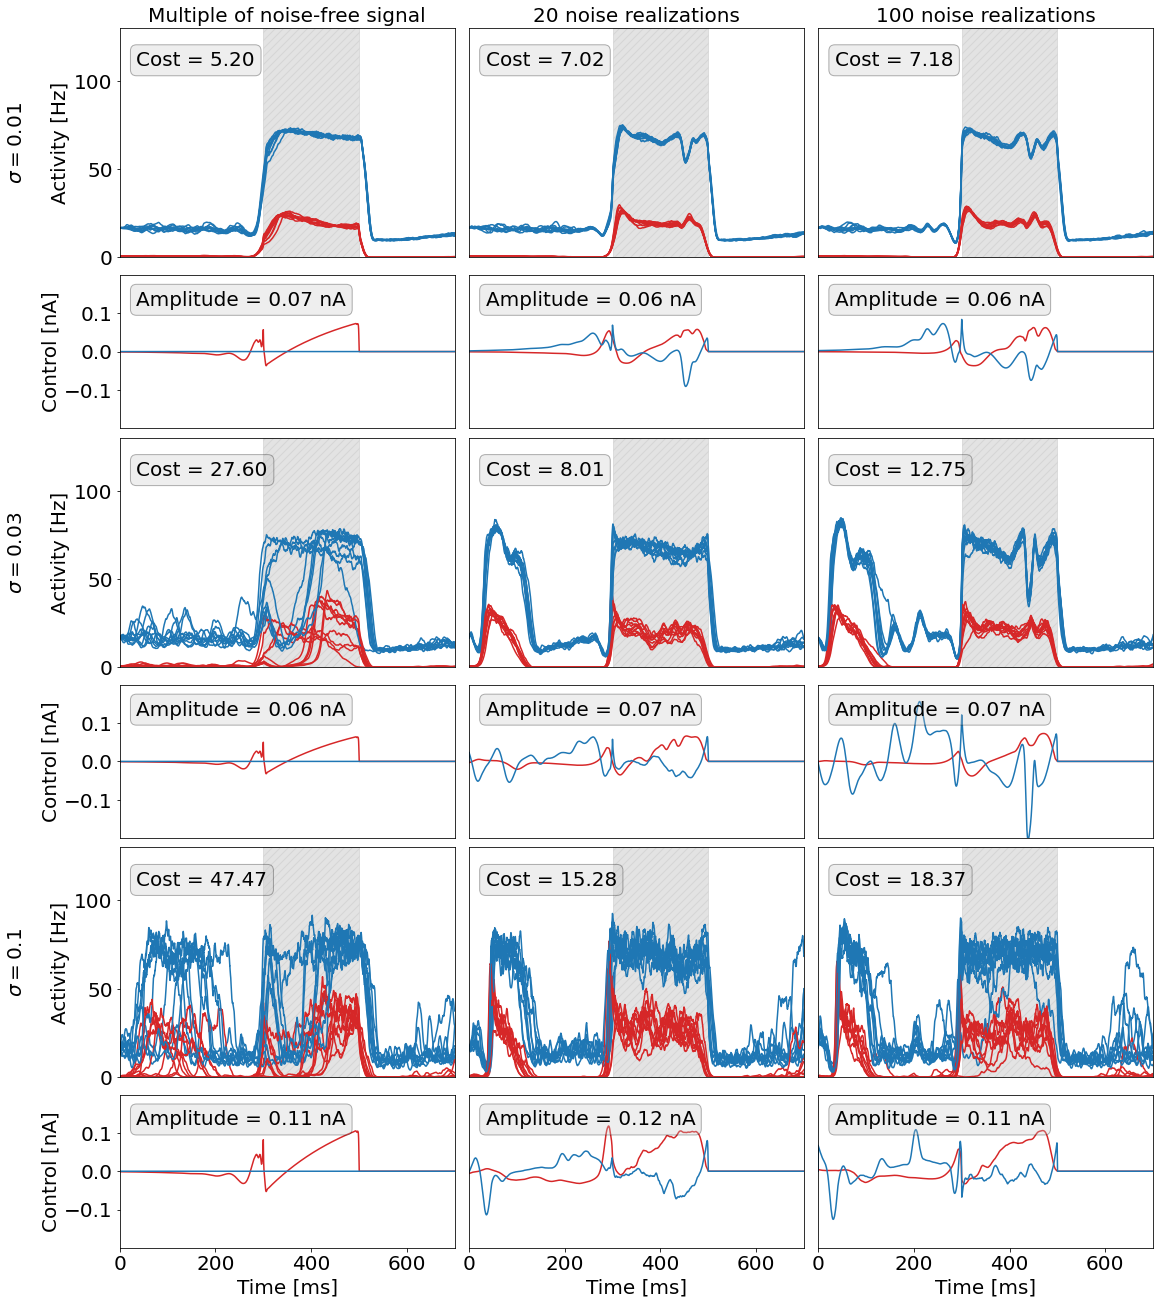

In [26]:
fs_ = 20
fig, ax = plt.subplots(6, 3, figsize=(16,18), constrained_layout=True, facecolor='white',
                       gridspec_kw={'height_ratios': [3,2,3,2,3,2]})
#fig.suptitle('Point b', fontsize=fs_)
plot_realizations = 10
dur_post_plot = 200.

t_array = np.arange(0,dur+dur_post_plot+aln.params.dt,aln.params.dt)
ax[0,0].set_title('Multiple of noise-free signal', fontsize=fs_)

setinit(initVars, aln)
aln.params.duration = dur + dur_post_plot
cntrl_plot = aln.getZeroControl()

for i_sigma in range(3):
    for i_noise in range(3):
        
        if i_noise in []:
            continue
            
        if i_sigma in []:
            continue
        
        noise_realizations = noise_realizations_array[i_noise]
        sigma_ou = sigma_ou_array[i_sigma]
        aln.params.sigma_ou = sigma_ou
        
        if i_noise != 0:
            ax[0,i_noise].set_title('{} noise realizations'.format(noise_realizations), fontsize=fs_)

        cntrl_plot[:,:,:-int(dur_post_plot/aln.params.dt)] = control_[i_sigma][i_noise][0,:,100:-100]
        ax[2*i_sigma+1,i_noise].plot( t_array, cntrl_plot[0,0,:]/5., color=exc_red)
        ax[2*i_sigma+1,i_noise].plot( t_array, cntrl_plot[0,1,:]/5., color=inh_blue)

        for indexx in range(plot_realizations):
            aln.run(control=cntrl_plot)
            ax[2*i_sigma,i_noise].plot( t_array, aln.rates_exc[0,:], color=exc_red)
            ax[2*i_sigma,i_noise].plot( t_array, aln.rates_inh[0,:], color=inh_blue)

        ax[2*i_sigma,i_noise].text(0.05, 0.9, 'Cost = {:.2f}'.format(cost_final_mean[i_sigma, i_noise]),
                horizontalalignment='left', verticalalignment='top', transform=ax[2*i_sigma,i_noise].transAxes,
                bbox=dict(boxstyle='round', facecolor=midgrey, alpha=0.3), fontsize=fs_)
        
        ax[2*i_sigma+1,i_noise].text(0.05, 0.9, 'Amplitude = {:.2f} nA'.format(
            np.amax(control_[i_sigma][i_noise][0,0,100:-100]/5.)), horizontalalignment='left',
            verticalalignment='top', transform=ax[2*i_sigma+1,i_noise].transAxes,
            bbox=dict(boxstyle='round', facecolor=midgrey, alpha=0.3), fontsize=fs_)
        
    #ax[2*i_sigma+1,0].text(0.05, 0.9, 'Factor = {:.2f}'.format(factor[i_sigma]),
    #        horizontalalignment='left', verticalalignment='top', transform=ax[2*i_sigma+1,0].transAxes,
    #        bbox=dict(boxstyle='round', facecolor=midgrey, alpha=0.3), fontsize=fs_)

for j in range(6):
    for k in range(3):
        ax[j,k].tick_params(axis='x', labelsize=fs_)
        ax[j,k].tick_params(axis='y', labelsize=fs_)
        ax[j,k].set_xlim(0,dur+dur_post_plot)
        ax[j,k].grid(False)
        if j != 5:
            ax[j,k].set_xticks([])
        else:
            ax[j,k].set_xlabel('Time [ms]', fontsize=fs_)
        if k != 0:
            ax[j,k].set_yticks([])
        if j%2 == 0:
            ax[j,k].set_ylim(0,130)
            ax[j,0].set_yticks(np.arange(0,140,50))
            sigma_ou = sigma_ou_array[int(j/2)]
            ax[j,0].set_ylabel(r'$\sigma=$' + '{}'.format(sigma_ou) + '\n' + '\n' 
                                + 'Activity [Hz]', fontsize=fs_)
            ax[j,k].axvspan( dur*trans_time, dur, facecolor=midgrey,
                            alpha=0.5, zorder=-1, hatch='///', edgecolor = midgrey)
        elif j%2 == 1:
            ax[j,k].set_ylim(-0.2,0.2)
            ax[j,0].set_yticks(np.arange(-0.1,0.11,0.1))
            ax[j,0].set_ylabel('Control [nA]', fontsize=fs_)


filename_ = nb[:-6] + '.png'
    
fig.savefig(filename_)
fig.savefig(os.path.join(savepath, filename_))
plt.show()